<a href="https://colab.research.google.com/github/falahamro/Deep-Learning/blob/main/Marketing_Data_Campaign_Exploratory_Data_Analysis_(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The data set marketing_data.csv consists of 2,240 customers of the company with information on:

Campaign successes/failures
Product preferences
Channel performances
Customer profiles based on the spending habits


**Importing the necessary libraries and overview of the dataset**

In [ ]:
# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings('ignore')

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization 
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sbs

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# load the dataset

df = pd.read_csv("/content/drive/MyDrive/Data Science Challenges /Marketingdata.csv")

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,0,189,104,...,6,1,0,1,0,0,0,0,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,0,464,5,...,7,5,0,1,0,0,0,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,0,134,11,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,0,10,0,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,0,6,16,...,2,7,1,1,0,0,0,0,0,SP


Checking the info of the dataset


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   i

In [ ]:
# Null values in the income volumn 
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp1            0
AcceptedCmp2            0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp6            0
Complain                0
Country                 0
dtype: int64

Observations:

There are a total of 27 columns and 2,240 observations in the dataset.
We can see that the Income column has less than 2,240 non-null values, i.e., the Income column has missing values. We'll explore this further.

Let's check the percentage of missing values for the Income column


In [ ]:
# Percentage of null values

(df.isnull().sum()/df.shape[0] * 100)['Income']

1.0714285714285714

The Income column has ~1.07% missing values.

Let's create a list of the numerical columns in the dataset and check the summary statisitcs 
 We need to find the summary statisitcs for numerical columns using the describe function and write obserations next. 

 

In [ ]:
# num_cols that contain numerical variables 

num_cols = ['Year_Birth', 'Income', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Kidhome',
       'Teenhome']

In [ ]:
# Print the descriptive statistics of numerical columns 

df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0
MntSweetProducts,2240.0,27.062946,41.280498,0.0,1.00,8.0,33.00,263.0
MntGoldProds,2240.0,44.021875,52.167439,0.0,9.00,24.0,56.00,362.0
NumDealsPurchases,2240.0,2.325000,1.932238,0.0,1.00,2.0,3.00,15.0


Creating a list of categorical columns in the dataset and check the count of each category

In [ ]:
cat_cols = ['Education', 'Marital_Status', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'AcceptedCmp6', 'Complain', 'Country']

In [ ]:
# Print the count of each unique value in each column 

for column in cat_cols:
  print(df[column].value_counts(normalize=True))

  print("-" * 40)

Graduation    0.503125
PhD           0.216964
Master        0.165179
2n Cycle      0.090625
Basic         0.024107
Name: Education, dtype: float64
----------------------------------------
Married     0.385714
Together    0.258929
Single      0.214286
Divorced    0.103571
Widow       0.034375
Alone       0.001339
YOLO        0.000893
Absurd      0.000893
Name: Marital_Status, dtype: float64
----------------------------------------
0    0.927232
1    0.072768
Name: AcceptedCmp3, dtype: float64
----------------------------------------
0    0.935714
1    0.064286
Name: AcceptedCmp4, dtype: float64
----------------------------------------
0    0.925446
1    0.074554
Name: AcceptedCmp5, dtype: float64
----------------------------------------
0    0.927232
1    0.072768
Name: AcceptedCmp1, dtype: float64
----------------------------------------
0    0.850893
1    0.149107
Name: AcceptedCmp2, dtype: float64
----------------------------------------
0    0.986607
1    0.013393
Name: AcceptedCmp6

Replacing the "2n Cycle" category with "Master" in Education and "Alone" with "Single" in Marital_Status and "Absurd" and "YOLO" categories with "Others" in Marital_Status


In [ ]:
# Replacing the 2nd Clycle with Master 

df["Education"].replace(["2n Cycle"], "Master", inplace = True)

In [ ]:
# Replacing Alone with Single

df["Marital_Status"].replace(["Alone"], "Single", inplace = True)

In [ ]:
# Replacing Yolo and Absurd with Others 

df["Marital_Status"].replace(["Absurd", "YOLO"], "Others", inplace = True)

In [ ]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp1,AcceptedCmp2,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,0,189,104,...,6,1,0,1,0,0,0,0,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,0,464,5,...,7,5,0,1,0,0,0,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,0,134,11,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,0,10,0,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,0,6,16,...,2,7,1,1,0,0,0,0,0,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,99,372,18,...,11,4,0,0,0,0,0,0,0,US
2236,5263,1977,Master,Married,31056.0,1,0,99,5,10,...,3,8,0,0,0,0,0,0,0,SP
2237,22,1976,Graduation,Divorced,46310.0,1,0,99,185,2,...,5,8,0,0,0,0,0,0,0,SP
2238,528,1978,Graduation,Married,65819.0,0,0,99,267,38,...,10,3,0,0,0,0,0,0,0,IND


In [ ]:
df.Marital_Status.value_counts()

Married     864
Together    580
Single      483
Divorced    232
Widow        77
Others        4
Name: Marital_Status, dtype: int64

The majority of customers belong to the married category, and the other category has only 4 observations.

In [ ]:
df.Education.value_counts()

Graduation    1127
Master         573
PhD            486
Basic           54
Name: Education, dtype: int64

**Creating new features from the existing features**

In [ ]:
# Creating new features to get an overall picture of a customer, how much he/she has spent, 
# The number of children he/she has, total number of campaigns accepted, etc.

# The total spending by a customer 
spending_col = [col for col in df.columns if 'Mnt' in col]


df['Total_Spending'] = df[spending_col].sum(axis = 1)


# Total purchases made by a customer 
platform_col = [col for col in df.columns if 'Purchases' in col]
df['Total_Purchases'] = df[platform_col].sum(axis = 1)

# Total number of children 

df['NumberofChildren'] = df['Kidhome'] + df['Teenhome']

# Total number of campain accepted by a customer 

campaign_cols = [col for col in df.columns if 'Cmp' in col]

df['TotalCampaignsACC'] = df[campaign_cols].sum(axis = 1)


In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,Complain,Country,Total_Spending,Total_Purchases,NumberofChildren,TotalCampaignsACC
0,1826,1970,Graduation,Divorced,84835.0,0,0,0,189,104,...,0,0,0,0,0,SP,1190,15,0,1
1,1,1961,Graduation,Single,57091.0,0,0,0,464,5,...,0,0,0,1,0,CA,577,18,0,2
2,10476,1958,Graduation,Married,67267.0,0,1,0,134,11,...,0,0,0,0,0,US,251,11,1,0
3,1386,1967,Graduation,Together,32474.0,1,1,0,10,0,...,0,0,0,0,0,AUS,11,4,2,0
4,5371,1989,Graduation,Single,21474.0,1,0,0,6,16,...,0,0,0,0,0,SP,91,8,1,2


Let's check outliers for new variables - Total_Spending, Total_Purchase. Also, let's analyze the Year_Birth column as we observed above that it had a minimum value of 1893.


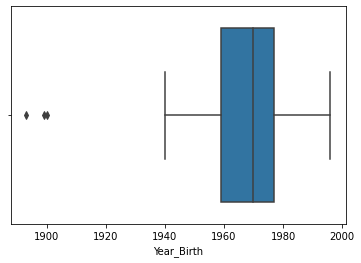

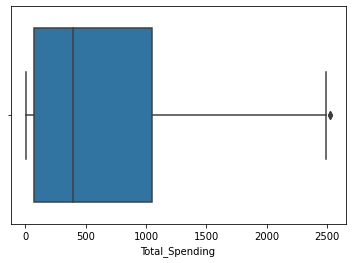

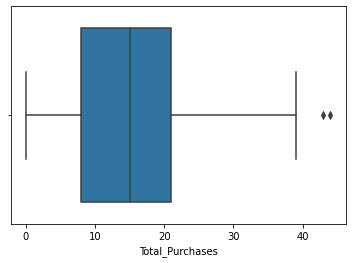

In [ ]:
# Plotting boxplot fpr Year_Birth, Total_Spending, Total_Purchases
import seaborn as sns
cols = ['Year_Birth', 'Total_Spending', 'Total_Purchases']

for i in cols:
    sns.boxplot(x = df[i])
    plt.show()

Observations:

The birth year is reported as <=1900 for some users, while the current year is 2022. It's very unlikely that the person is alive. It may be a reporting error.
There are some outliers in total spending and total purchase.
The observations marked as outliers are very closed to the upper whisker and some extreme points can be expected for variables like total spending. We can leave these outliers untreated.

Let's check the number of observations for which the year of birth is less than 1900.

In [ ]:
df[df['Year_Birth'] < 1900]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,Complain,Country,Total_Spending,Total_Purchases,NumberofChildren,TotalCampaignsACC
513,11004,1893,Master,Single,60182.0,0,1,23,8,0,...,0,0,0,0,0,SA,22,4,1,0
827,1150,1899,PhD,Together,83532.0,0,0,36,755,144,...,1,0,0,0,0,SP,1853,15,0,1


In [ ]:
# Keeping data for customers having birth year > 1900

df[df['Year_Birth'] > 1900]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,Complain,Country,Total_Spending,Total_Purchases,NumberofChildren,TotalCampaignsACC
0,1826,1970,Graduation,Divorced,84835.0,0,0,0,189,104,...,0,0,0,0,0,SP,1190,15,0,1
1,1,1961,Graduation,Single,57091.0,0,0,0,464,5,...,0,0,0,1,0,CA,577,18,0,2
2,10476,1958,Graduation,Married,67267.0,0,1,0,134,11,...,0,0,0,0,0,US,251,11,1,0
3,1386,1967,Graduation,Together,32474.0,1,1,0,10,0,...,0,0,0,0,0,AUS,11,4,2,0
4,5371,1989,Graduation,Single,21474.0,1,0,0,6,16,...,0,0,0,0,0,SP,91,8,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10142,1976,PhD,Divorced,66476.0,0,1,99,372,18,...,0,0,0,0,0,US,689,20,1,0
2236,5263,1977,Master,Married,31056.0,1,0,99,5,10,...,0,0,0,0,0,SP,55,5,1,0
2237,22,1976,Graduation,Divorced,46310.0,1,0,99,185,2,...,0,0,0,0,0,SP,309,14,1,0
2238,528,1978,Graduation,Married,65819.0,0,0,99,267,38,...,0,0,0,0,0,IND,1383,20,0,0


Check the outliers and impute the missing values for the Income variable


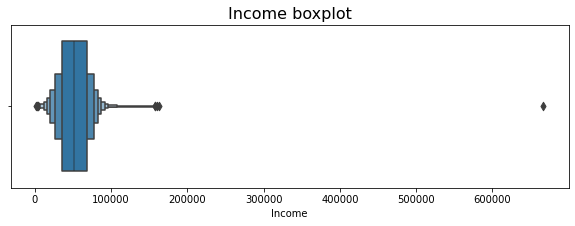

In [ ]:
# # Plotting the boxplot for income

plt.figure(figsize=(10, 3))
sns.boxenplot(df['Income'])

plt.title('Income boxplot', size = 16)

plt.show()

Observations:

We can observe from the boxplot that there are some outliers in the income variable.
Let's find the value at upper whisker to check how many observations are marked as outliers.

In [ ]:
# Calculating the upper whister for the Income variable 

Q1 = df.quantile(q = 0.25) # First Quartile

Q3 = df.quantile(q = 0.75) # Third quartile


IQR = Q3 - Q1


upper_whisker = (Q3 + 1.5 * IQR)['Income'] # Upper Whisker

print(upper_whisker)

118350.5


In [ ]:
# Viewing the obserations makred as outliers

df[df.Income > upper_whisker]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,Complain,Country,Total_Spending,Total_Purchases,NumberofChildren,TotalCampaignsACC
325,4931,1977,Graduation,Together,157146.0,0,0,13,1,0,...,0,0,0,0,0,SA,1730,28,0,0
497,1501,1982,PhD,Married,160803.0,0,0,21,55,16,...,0,0,0,0,0,US,1717,44,0,0
527,9432,1977,Graduation,Together,666666.0,1,0,23,9,14,...,0,0,0,0,0,SA,62,11,1,0
731,1503,1976,PhD,Together,162397.0,1,1,31,85,1,...,0,0,0,0,0,SP,107,1,2,0
853,5336,1971,Master,Together,157733.0,1,0,37,39,1,...,0,0,0,0,0,SP,59,2,1,0
1826,5555,1975,Graduation,Divorced,153924.0,0,0,81,1,1,...,0,0,0,0,0,SP,6,0,0,0
1925,11181,1949,PhD,Married,156924.0,0,0,85,2,1,...,0,0,0,0,0,CA,8,0,0,0
2204,8475,1973,PhD,Married,157243.0,0,1,98,20,2,...,0,0,0,0,0,IND,1608,37,1,0



Observations:

We have only 8 observations with an income greater than the upper whisker.

Only 3 observations (ID - 4931, 1501, 8475) out of 8 outliers have purchased more than 11 times in the last 2 years.

Other 5 observations have a very less amount of total spending.

Let's compare the summary statistics for these observations with observations on the other side of the upper whisker.



In [ ]:
# Checking the summary statisitcs for observations makred as outliers

df[df.Income > upper_whisker].describe().T

,count,mean,std,min,25%,50%,75%,max
ID,8.0,5989.250,3525.251308,1501.0,4074.00,5445.5,8714.25,11181.0
Year_Birth,8.0,1972.500,10.028531,1949.0,1972.50,1975.5,1977.00,1982.0
Income,8.0,221604.500,179850.404431,153924.0,157090.50,157488.0,161201.50,666666.0
Kidhome,8.0,0.375,0.517549,0.0,0.00,0.0,1.00,1.0
Teenhome,8.0,0.250,0.462910,0.0,0.00,0.0,0.25,1.0
Recency,8.0,48.625,33.687376,13.0,22.50,34.0,82.00,98.0
MntWines,8.0,26.500,30.798887,1.0,1.75,14.5,43.00,85.0
MntFruits,8.0,4.500,6.524678,0.0,1.00,1.0,5.00,16.0
MntMeatProducts,8.0,621.875,846.511402,1.0,7.25,17.0,1592.00,1725.0
MntFishProducts,8.0,4.250,5.650537,1.0,1.00,2.0,3.50,17.0


In [ ]:
# Checking the summary statisitcs for observations not marked as outliers
df[df.Income < upper_whisker].describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2208.0,5586.900815,3249.110303,0.0,2814.75,5458.5,8418.50,11191.0
Year_Birth,2208.0,1968.807065,11.991913,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2208.0,51633.638134,20713.376530,1730.0,35196.00,51301.0,68289.75,113734.0
Kidhome,2208.0,0.442029,0.537063,0.0,0.00,0.0,1.00,2.0
Teenhome,2208.0,0.506341,0.544325,0.0,0.00,0.0,1.00,2.0
Recency,2208.0,49.014040,28.938638,0.0,24.00,49.0,74.00,99.0
MntWines,2208.0,306.100996,337.516270,0.0,24.00,177.5,507.00,1493.0
MntFruits,2208.0,26.435236,39.842478,0.0,2.00,8.0,33.00,199.0
MntMeatProducts,2208.0,165.347826,217.852649,0.0,16.00,68.0,232.00,1725.0
MntFishProducts,2208.0,37.758605,54.813323,0.0,3.00,12.0,50.00,259.0


Observations:

None of the outliers have accepted any of the campaigns or submitted any complaints in the last 2 years.

We can see that customers who are outliers have lower mean expenditure per customer for all the products except meat products.

The outliers have a higher number of catalog purchases on average and a very low number of web purchases.

We can drop the 5 observations at indices [527, 731, 853, 1826, 1925] of a number of total_purchase less than 11 as they would not add value to our analysis.

In [ ]:
# Dropping 5 observations at indices 527, 731, 853, 1826, 1925
df.drop(index = [527, 731, 853, 1826, 1925], inplace = True)

In [ ]:
df[df.Income > upper_whisker]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp6,Complain,Country,Total_Spending,Total_Purchases,NumberofChildren,TotalCampaignsACC
325,4931,1977,Graduation,Together,157146.0,0,0,13,1,0,...,0,0,0,0,0,SA,1730,28,0,0
497,1501,1982,PhD,Married,160803.0,0,0,21,55,16,...,0,0,0,0,0,US,1717,44,0,0
2204,8475,1973,PhD,Married,157243.0,0,1,98,20,2,...,0,0,0,0,0,IND,1608,37,1,0


Check the distribution for Income


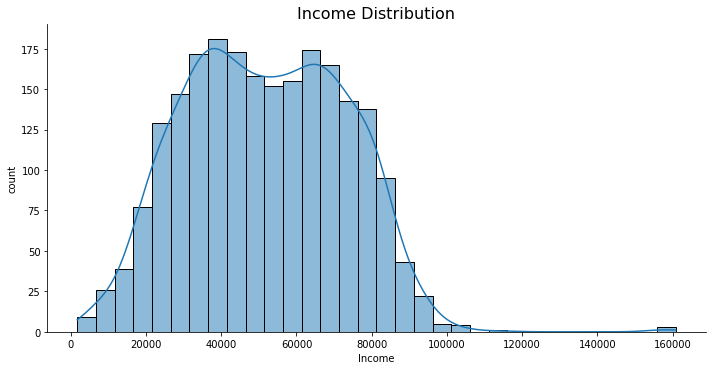

In [ ]:
# Plotting displot for income

sns.displot(df['Income'], kde = True, height = 5, aspect = 2)

plt.title('Income Distribution', size = 16)


plt.ylabel('count');


Observations:

After treating outliers, the distribution for the income variable is close to a normal distribution with very few extreme observations to the right.

We will replace the missing values for the income variable with the median and not the mean, as the variable is slightly skewed to the right.

In [ ]:
# Filling null values with median 

df['Income'].fillna(df.Income.median(), inplace = True)

In [ ]:
df.Income.isnull().sum()

0

**Analyzing all the campaigns**

observations on acceptance rate for each campaign given in the below plot.

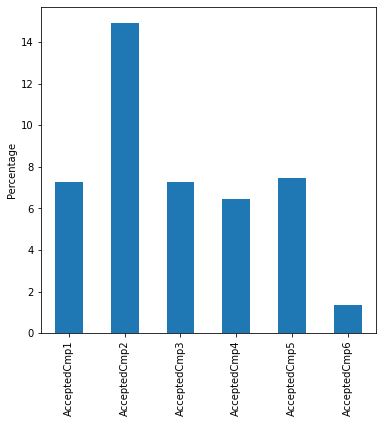

In [ ]:
# Plotting the % acceptance for every campaign 

Camp_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6']

success_campaign = (df[Camp_cols].sum()/df.shape[0]) * 100

# Plot 

success_campaign.plot(kind = 'bar', figsize = (6, 6))

plt.ylabel("Percentage")

plt.show()

In [ ]:
success_campaign

AcceptedCmp1     7.293065
AcceptedCmp2    14.944072
AcceptedCmp3     7.293065
AcceptedCmp4     6.442953
AcceptedCmp5     7.472036
AcceptedCmp6     1.342282
dtype: float64

Observations:

The acceptance rate of campaign 2 (AcceptedCmp2) is the highest, while the acceptance rate of canpaign 6 (AcceptedCmp6) is the lowest.

Campaign 1, 3, and 5 have similar acceptance rate in the range of 7.25 t0 7.48.

The median of acceptance rate are the average of campaign 1 and 3.

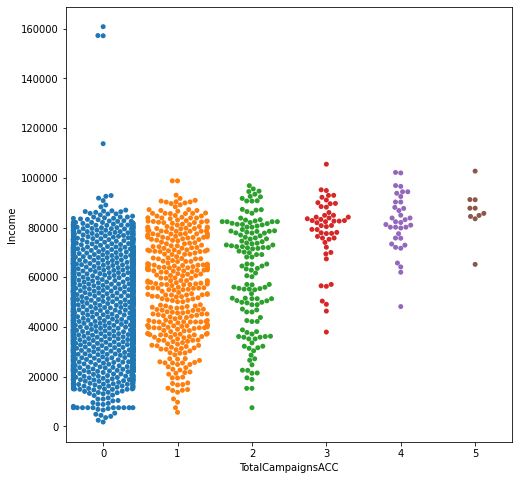

In [ ]:
# Which kind of customers accepting campaigns?

plt.figure(figsize = (8, 8))

sns.swarmplot(x = 'TotalCampaignsACC', y = 'Income', data = df)

plt.show()

Observation:

Higher the income, the higher the number of campaigns accepted.


In [ ]:
# Calculate the mean income of customers 
df.Income.mean()

51774.1033557047

The mean income of customers is close to 52K. Let's divide the income into 2 segments of income>52k and income<52k and check the acceptance rate in each segment.

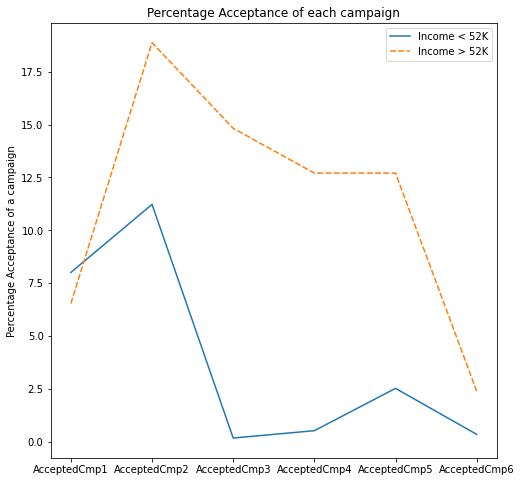

In [ ]:
# Making Dataframes of customers having income <52k and >52K

df1 = df[df.Income < 52000]

df2 = df[df.Income > 52000]

Camp_cols = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp6']

# Calculating the success rate of each campaign for both segments 

success_campaign1 = pd.DataFrame((df1[Camp_cols].sum()/df1.shape[0]) * 100, columns= ['Income < 52K'])

success_campaign2 = pd.DataFrame((df2[Camp_cols].sum()/df2.shape[0]) * 100, columns = ['Income > 52K'])

new_df = pd.concat([success_campaign1, success_campaign2], axis = 1)

# Plot

plt.figure(figsize= (8, 8))

sns.lineplot(data = new_df)

plt.title("Percentage Acceptance of each campaign")

plt.ylabel("Percentage Acceptance of a campaign")

plt.show()

Observations:

Customers with average income more than 52k have more percent acceptance rate of all campaigns than customer with average income of less than 52k, except campaign 1.

The highest acceptance rate is shown in the second campaign for both segment of income.

Campaign 6 of both incomes is getting accepted the least.

For customer with average income > 52k, the acceptance rate is decreasing from campaign 2 to 6, respectively.

Let's find out who has accepted the last campaign and what could be the reason?

In [ ]:
df[df['AcceptedCmp6'] == 1].shape

(30, 31)

There are only 30 customers who have accepted the last campaign.

Let's check if these customers are new or if they have accepted previous campaigns as well.


In [ ]:
grouped2 = df.groupby('AcceptedCmp6').mean()['TotalCampaignsACC']
grouped2

AcceptedCmp6
0    0.404535
1    3.633333
Name: TotalCampaignsACC, dtype: float64


Observations:

We know that the maximum number of campaigns any customer has accepted is 5.

We can observe that the value for TotalCampaignsAcc is ~3.6 for customers who have accepted the last campaign.

This implies that these 30 customers are those loyal customers who have been accepting most of the campaigns.

It could be that different campaigns are focused on a different set of products. Let's check if the product preference for those who accepted the campaigns is different from those who didn't, using the amount spent and the number of purchases. 

Let's define a function that will take the column name for the product as the input and will generate the barplot for every campaign and the average amount spent on a product.

In [ ]:
def amount_per_campaign(columns_name):
    p1 = pd.DataFrame(df.groupby(['AcceptedCmp1']).mean()[columns_name]).T
    
    p2 = pd.DataFrame(df.groupby(['AcceptedCmp2']).mean()[columns_name]).T
    
    p3 = pd.DataFrame(df.groupby(['AcceptedCmp3']).mean()[columns_name]).T
    
    p4 = pd.DataFrame(df.groupby(['AcceptedCmp4']).mean()[columns_name]).T
    
    p5 = pd.DataFrame(df.groupby(['AcceptedCmp5']).mean()[columns_name]).T
    
    p6 = pd.DataFrame(df.groupby(['AcceptedCmp6']).mean()[columns_name]).T
    
    pd.concat([p1, p2, p3, p4, p5, p6], axis = 0).set_index([Camp_cols]).plot(kind = 'line', figsize = (8, 8))
    
    plt.ylabel('Average amount spend on' + ' ' + columns_name)
    
    plt.show()


Use the function defined above to generate barplots for different purchasing Products


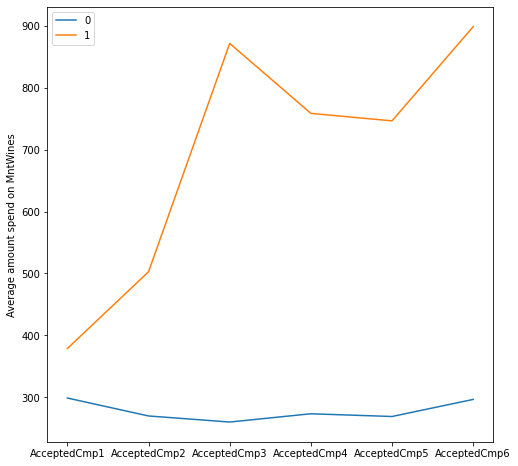

In [ ]:
# Showing how to use the above function on the column MntWines

amount_per_campaign('MntWines')

Observation:

For the customers accepting campaign 3, 4, 5, and 6, the average amount spent on wine is quite high.


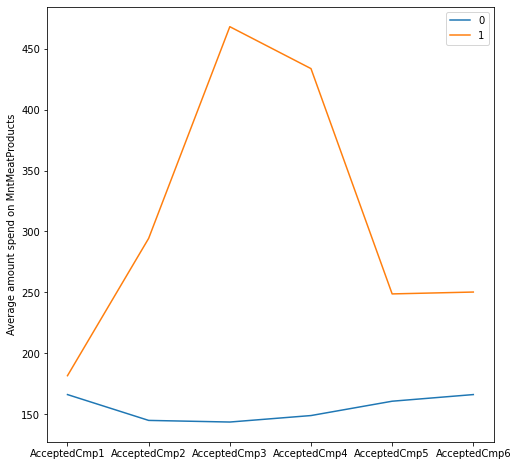

In [ ]:
# Meat products

# Call the function amount_per_campaign for MntMeatProducts
amount_per_campaign('MntMeatProducts')

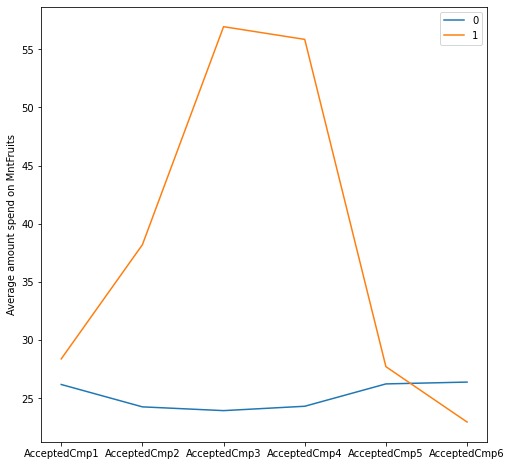

In [ ]:
# Fruit products

# Call the function amount_per_campaign for MntFruits
amount_per_campaign('MntFruits')

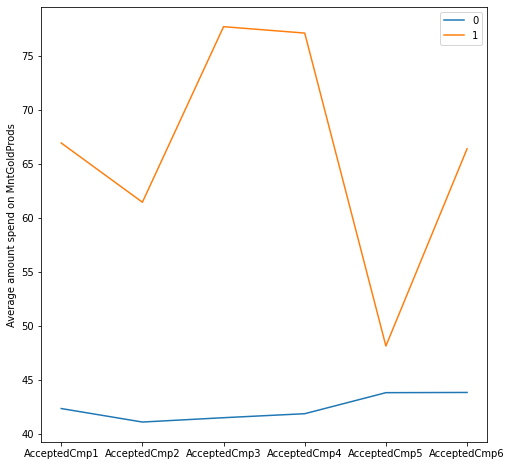

In [ ]:
# Gold products

# Call the function amount_per_campaign for MntGoldProds
amount_per_campaign('MntGoldProds')

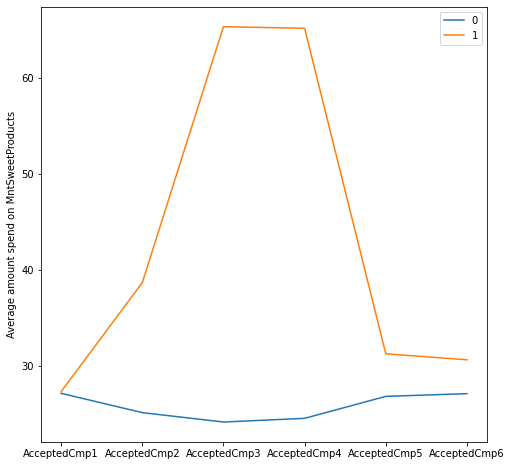

In [ ]:

# Sweet products

# Call the function amount_per_campaign for MntSweetProducts
amount_per_campaign('MntSweetProducts')


Observations:

1. The average amount spent on meat, fruit, and sweet products are the highest from customers who are accepting campaign 3. The second highest is from customers who are accepting campaign 4.

2. For gold products, customers who are accepting campaign 4 spent the most and slighly more than customers who are accepting campaign 3.

3. If we compare all the amount spent on all products of customers, all campaign (from 1 to 6) show the amount spend on each product higher than customer who are not accepting the campaigns. However, only for the fruit products, customers who are accepting campaign 6 spent less amount than customers who are not accepting campaign.

We have analyzed the relationship between campaigns and different products. Now, let's see the relationship of campaigns with different purchasing channels.



**Relationship of campaigns with different purchasing channels**

We have a defined a function which will take the column name of the channel as the input and will generate the barplot for every campaign and average purchase made through that channel if the campaign is accepted.



In [ ]:
def Purchases_per_campaign(columns_name):
    dp1 = pd.DataFrame(df.groupby(['AcceptedCmp1']).mean()[columns_name]).T
    
    dp2 = pd.DataFrame(df.groupby(['AcceptedCmp2']).mean()[columns_name]).T
    
    dp3 = pd.DataFrame(df.groupby(['AcceptedCmp3']).mean()[columns_name]).T
    
    dp4 = pd.DataFrame(df.groupby(['AcceptedCmp4']).mean()[columns_name]).T
    
    dp5 = pd.DataFrame(df.groupby(['AcceptedCmp5']).mean()[columns_name]).T
    
    dp6 = pd.DataFrame(df.groupby(['AcceptedCmp6']).mean()[columns_name]).T
    
    pd.concat([dp1, dp2, dp3, dp4, dp5, dp6], axis = 0).set_index([Camp_cols]).plot(kind = 'line', figsize = (8, 8))
    
    plt.ylabel('Average' + ' ' + columns_name)
    
    plt.show()

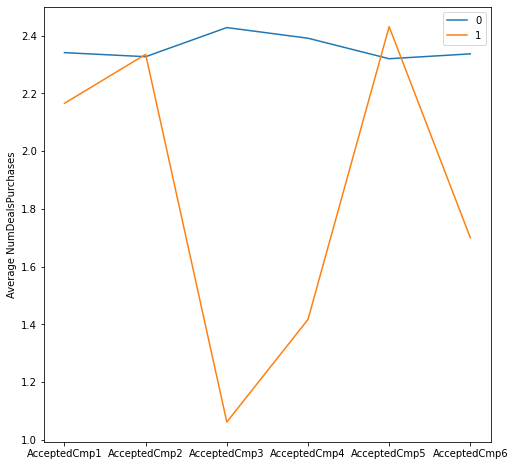

In [ ]:
# Here is an example showing how to use this function on the column NumDealsPurchases
Purchases_per_campaign('NumDealsPurchases')

Observation:

For the customers accepting campaign 3, 4, and 6, the average number of deals purchase is quite low.


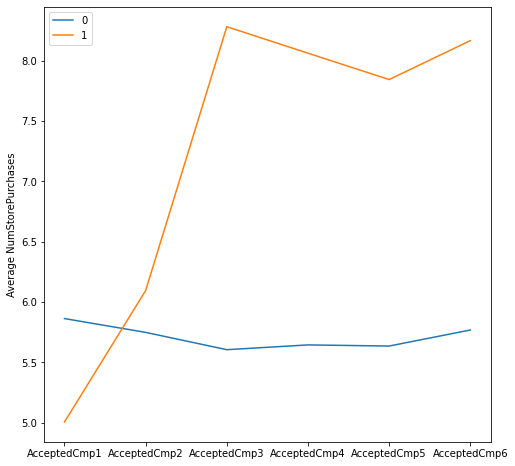

In [ ]:
# Store purchase

# Call the function Purchases_per_campaign for NumStorePurchases
Purchases_per_campaign('NumStorePurchases')

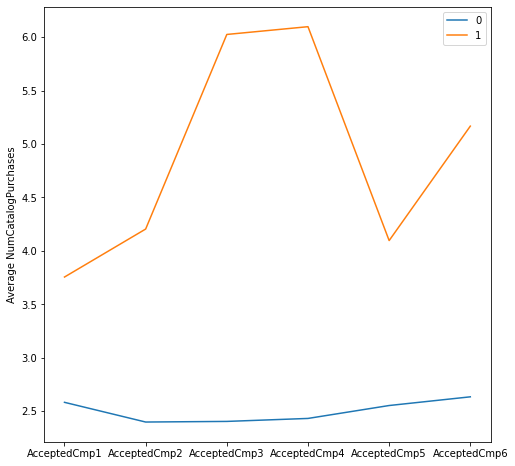

In [ ]:
# Catalog purchase

# Call the function Purchases_per_campaign for NumCatalogPurchases
Purchases_per_campaign('NumCatalogPurchases')

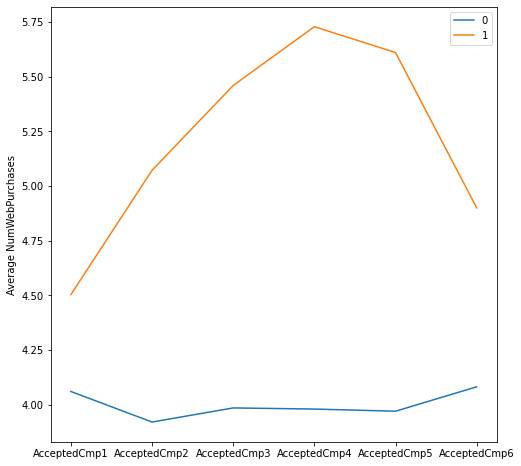

In [ ]:
# Web purchases

# Call the function Purchases_per_campaign for NumWebPurchases
Purchases_per_campaign('NumWebPurchases')

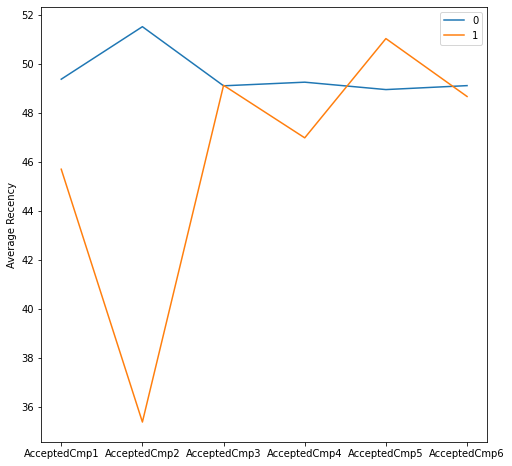

In [ ]:
# Recency

Purchases_per_campaign('Recency')

**We will check the percentage acceptance of each campaign with respect to each category in the categorical variable. The percentage acceptance is calculated as number of customers who have accepted the campaign to the total number of customers.**


In [ ]:
def Cat_Campaign_Relation(df, column_name):
    e1 = (df.groupby([column_name]).sum()['AcceptedCmp1']/df.groupby([column_name]).count()['AcceptedCmp1'])
    
    e2 = (df.groupby([column_name]).sum()['AcceptedCmp2']/df.groupby([column_name]).count()['AcceptedCmp2'])
    
    e3 = (df.groupby([column_name]).sum()['AcceptedCmp3']/df.groupby([column_name]).count()['AcceptedCmp3'])
    
    e4 = (df.groupby([column_name]).sum()['AcceptedCmp4']/df.groupby([column_name]).count()['AcceptedCmp4'])
    
    e5 = (df.groupby([column_name]).sum()['AcceptedCmp5']/df.groupby([column_name]).count()['AcceptedCmp5'])
    
    e6 = (df.groupby([column_name]).sum()['AcceptedCmp6']/df.groupby([column_name]).count()['AcceptedCmp6'])
    
    df_new = pd.concat([e1, e2, e3, e4, e5, e6], axis =  1).T
    
    plt.figure(figsize = (8, 8))
    
    sns.lineplot(data = df_new, markers = True, linewidth = 2)
    
    plt.ylabel('Percentage Acceptance')
    
    plt.show()

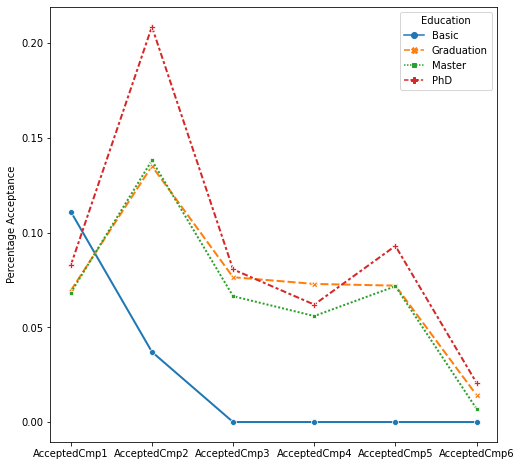

In [ ]:
# Here is an example showing how to use this function on the column Education
Cat_Campaign_Relation(df, 'Education')


Observations:

More than 20% of the customers with Ph.D. have accepted campaign 2.

Customers with basic education have only accepted campaign 1 and 2.

Except customers with basic education level, all education levels follow the same trend.

Code and observations on percentage acceptance for different categorical variables across all campaigns.

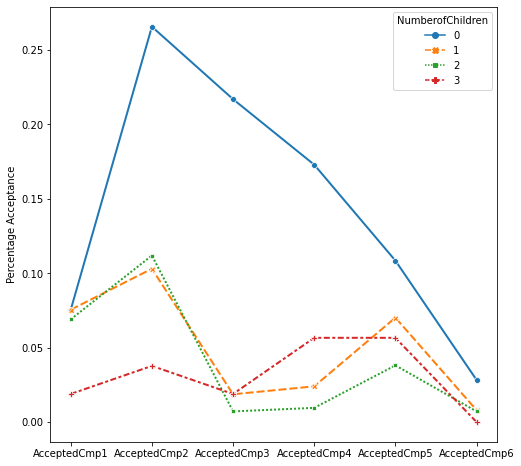

In [ ]:
# NumberofChildren

# Call the function Cat_Campaign_Relation for NumberofChildren
Cat_Campaign_Relation(df, 'NumberofChildren')

In [ ]:
# Let's filter the observations with 'Others' category as they are only 4 such observations
df_rest = df[df.Marital_Status != 'Others']

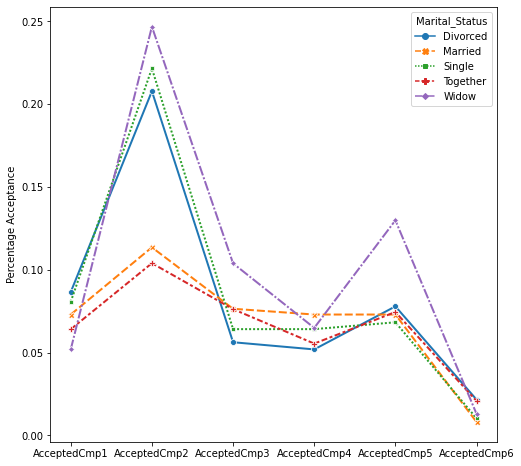

In [ ]:
# Call the function Cat_Campaign_Relation for Marital_Status with DataFrame df_rest
Cat_Campaign_Relation(df_rest, 'Marital_Status')

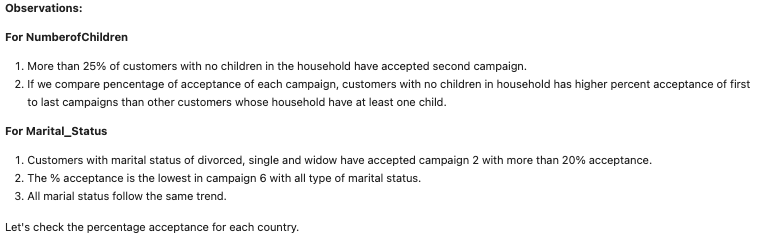

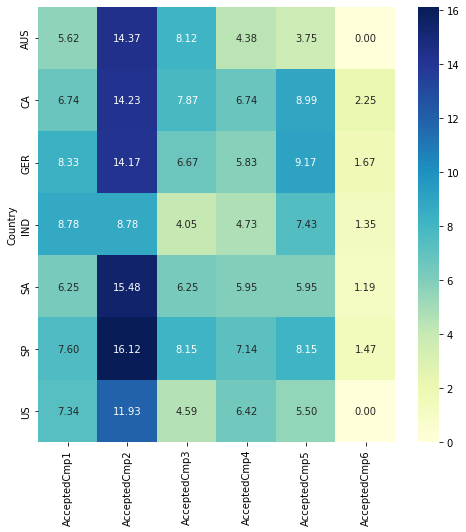

In [ ]:
# Let's filter the observations for 'ME' country as they are only 3 such observations
df_not_mexico = df[df.Country != 'ME']

# Plot
plt.figure(figsize = (8, 8))

sns.heatmap((df_not_mexico.groupby('Country').sum()[Camp_cols]/df_not_mexico.groupby('Country').count()[Camp_cols]) * 100, annot = True, fmt = '0.2f', cmap = "YlGnBu")


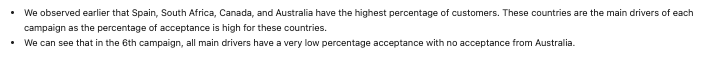

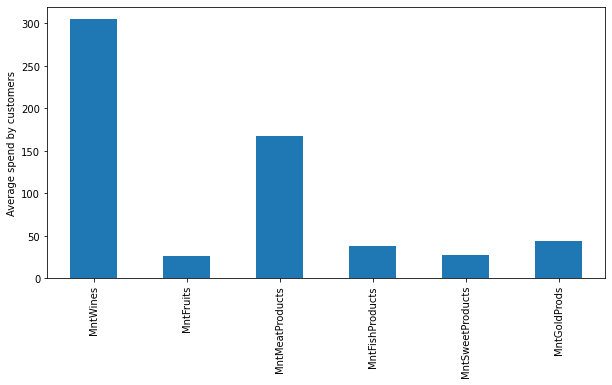

In [ ]:
# Creating a list which contains name of all products

mnt_cols = [col for col in df.columns if 'Mnt' in col]

spending = df[mnt_cols].mean(axis = 0)

spending.plot(kind = 'bar', figsize = (10, 5))

plt.ylabel("Average spend by customers")

plt.show()

Observation:

The mean amount spent by customers in the last 2 years is the highest for wines followed by the meat products.
Let's check if the product preferences are similar for different types of customers. We will calculate the percentage amount spent by customers on a product for each category with respect to the total spending by customers belonging to that category.

In [ ]:
def amount_per_category(df, column_name):
    df_new1 = ((df.groupby([column_name]).sum()[mnt_cols].T)/df.groupby([column_name]).sum()['Total_Spending'])
    
    plt.figure(figsize = (10, 8))
    
    sns.heatmap(df_new1.T, annot = True, cmap = "YlGnBu")
    
    plt.show()

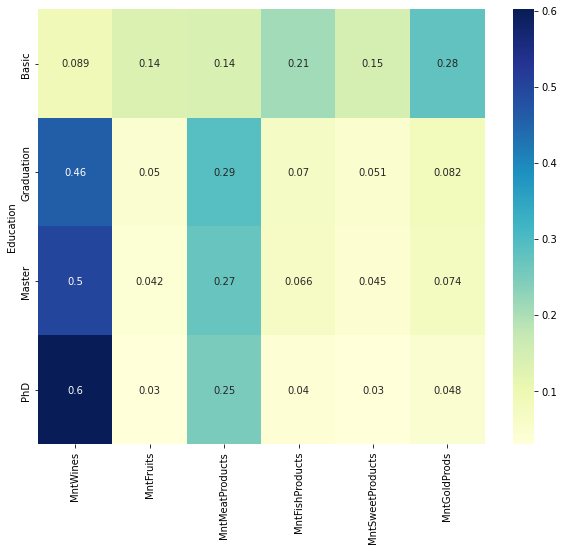

In [ ]:
# Plot showing the percentage of total spending on different products by a group of customers having the same education level

amount_per_category(df, 'Education')


Observations:

Customers with Ph.D. spend ~60% of their total spending on wines.
Customers with Graduation and Master's spends ~45-50% of their total spending on wines.
Customers with Graduation and Master's spends ~27-29% of their total spending on meat.
Customers with Ph.D. spend ~25% of their total spending on meat.
Customers having education level Master or Ph.D. spend ~80% on meat and wines.
Customers with basic education spend more on Fruits, Fish, Sweet, and Gold products.

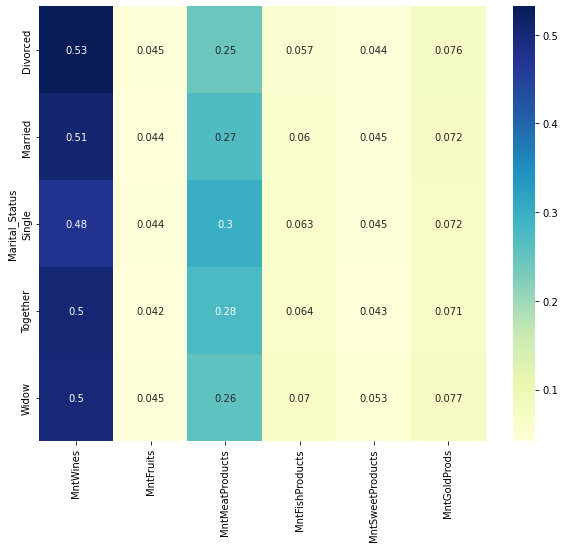

In [ ]:
# Call the function amount_per_category for Marital_Status with DataFrame df_rest
amount_per_category(df_rest, 'Marital_Status')

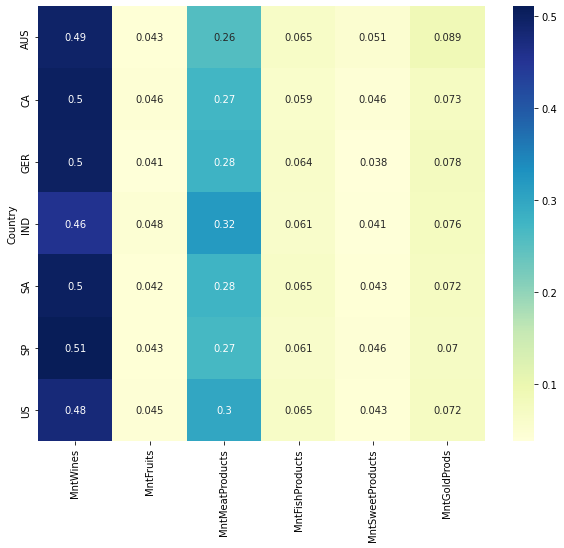

In [ ]:
# Call the function amount_per_category for Country with DataFrame df_not_mexico
amount_per_category(df_not_mexico, 'Country')

In [ ]:
# List of columns for channels

channel_cols = [col for col in df.columns if 'Purchases' in col] 

# Making DataFrame of columns having purchase and taking sum of them
#channels = pd.DataFrame(df[channel_cols].sum()/df.Total_Purchase.sum(), columns = ['NumberofPurchases'])



Let's check how number of purchases via different channels varies for different income bins?



In [ ]:
# Binning the icome column 
df['income_cat'] = pd.qcut(df.Income, q = [0, 0.25, 0.50, 0.75, 1], labels = ['low', 'medium', 'high', 'very_high'])

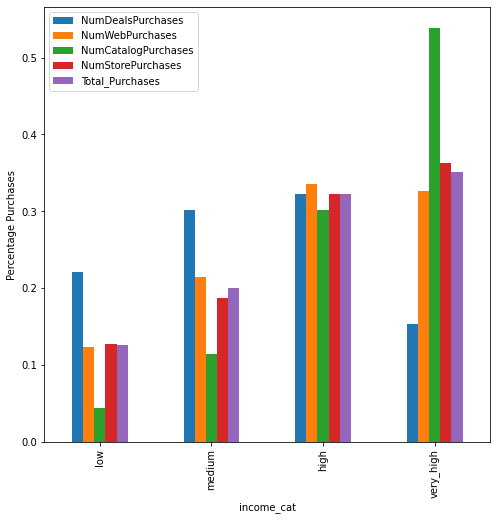

In [ ]:
group = df.groupby('income_cat').sum()[channel_cols]

(group/group.sum()).plot(kind = 'bar', figsize = (8, 8))

plt.ylabel("Percentage Purchases")

plt.show()

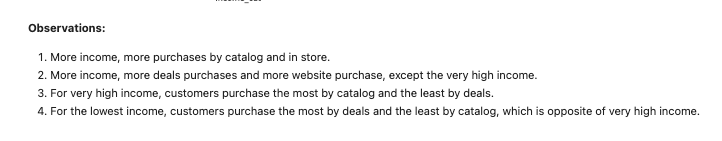

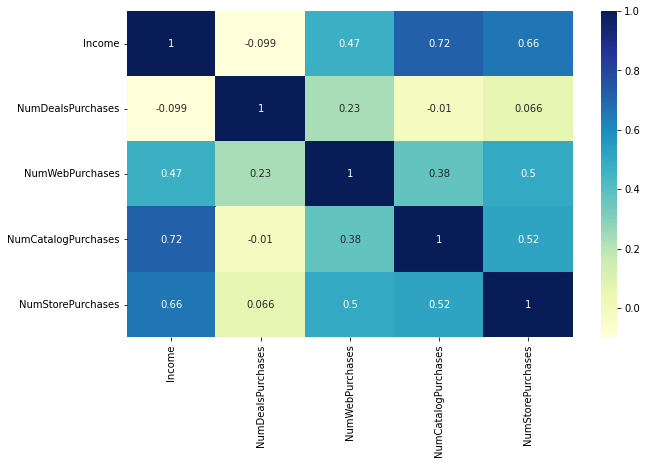

In [ ]:
corr = df[['Income', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases' ]].corr()

plt.figure(figsize = (10, 6))

sns.heatmap(corr, annot = True, cmap = "YlGnBu")

plt.show()

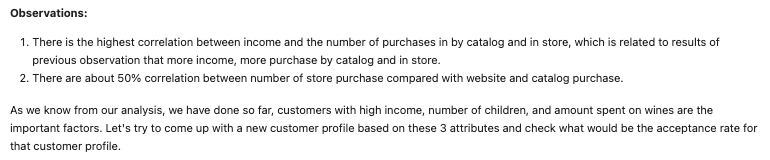

In [ ]:
# Customers with high income 
df3 = df[df.Income > 52000]

# Among customers with high income, selecting customers with high spending on wines
df4 = df3[df3.MntWines > df3.MntWines.mean()]

# Among customers with high income and high spending on wines, selecting customers with no children 
new_profile = df4[df4.NumberofChildren == 0]

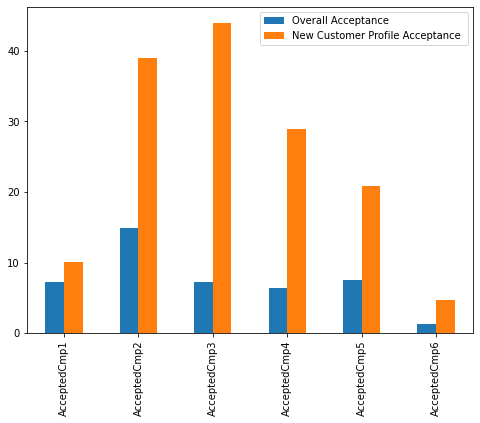

In [ ]:
# Calculating the success rate of each campaign for both segments
success_campaign3 = pd.DataFrame(success_campaign, columns = ['Overall Acceptance'])

success_campaign4 = pd.DataFrame((new_profile[Camp_cols].sum()/new_profile.shape[0]) * 100, columns = ['New Customer Profile Acceptance '])

# Plot
pd.concat([success_campaign3, success_campaign4], axis = 1).plot(kind = 'bar', figsize = (8, 6))

plt.title("")

plt.ylabel("")

plt.show()

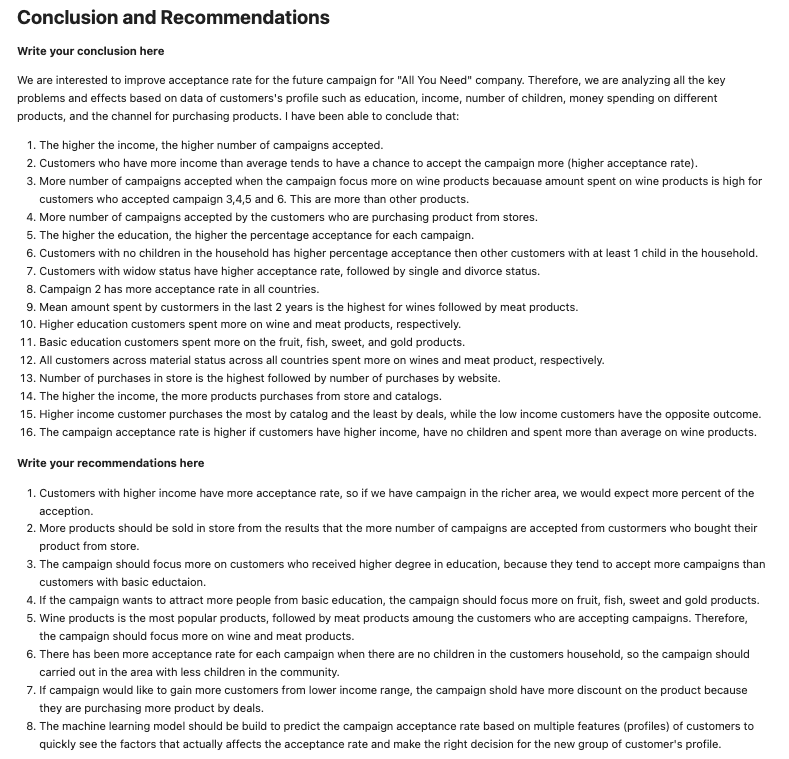